### Environment: 
conda install -c conda-forge matplotlib scipy jupyter mpld3  

pip install opencv-python

In [41]:
import cv2
import numpy as np
from scipy import ndimage, signal, spatial

In [42]:
def idw(data):
    valid = np.argwhere(~np.isnan(data))
    tree = spatial.cKDTree(valid)
    
    nans = np.argwhere(np.isnan(data))    
    for row in nans:
        d, idx = tree.query(row, k=12) #k = number of nearest neighbors
        d = np.power(d, -2) #each item in d raised to its reciprocated power (basis of idw) the value "r" also defines the smoothness of the interpolation
        v = data[valid[idx, 0], valid[idx, 1]] 
        data[row[0], row[1]] = np.inner(v, d)/np.sum(d) #nans are replaced with the result of (v * d)/sum(d)
        
    return data

In [43]:

def smi(img):
    rgb_bands = cv2.split(img)
    interp_bands = []
    for band in rgb_bands:
        masked = np.where(sm, np.nan, band)
        idw(masked)
        interp_bands.append(masked)
    result = cv2.merge(interp_bands)
    return result.astype('uint8')



In [44]:
def prog(infile):
    img = cv2.imread(infile)
    rgb_bands = cv2.split(img)
    red = rgb_bands[0].astype('float')
    green = rgb_bands[1].astype('float')
    blue = rgb_bands[2].astype('float')
    nred = red * (red + green + blue)
    nred_eroded = ndimage.grey_erosion(nred,size=3)
    sm = nred_eroded < 4250
    ip = smi(img,sm)
    outfile = infile.replace('.tif','_smi.tif')
    cv2.imwrite(outfile,ip)


In [ ]:
prog(r"E:\UNET\256_patches\images\LNU2_Ortho_1536_23040.tifpatch_10.tif")

### Data visualization

In [45]:
# allows zoom feature
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

plt.rcParams["figure.figsize"] = (15,15)

In [46]:
infile = r"E:\UNET\256_patches\images\LNU2_Ortho_1536_23040.tifpatch_10.tif"

img = cv2.imread(infile)
rgb_bands = cv2.split(img)
red = rgb_bands[0]
green = rgb_bands[1]
blue = rgb_bands[2]
red = red.astype('float')
green = green.astype('float')
blue = blue.astype('float')
nred = red * (red + green + blue)
nred_eroded = ndimage.grey_erosion(nred,size=3)
sm = nred_eroded < 4250
ip = smi(img)

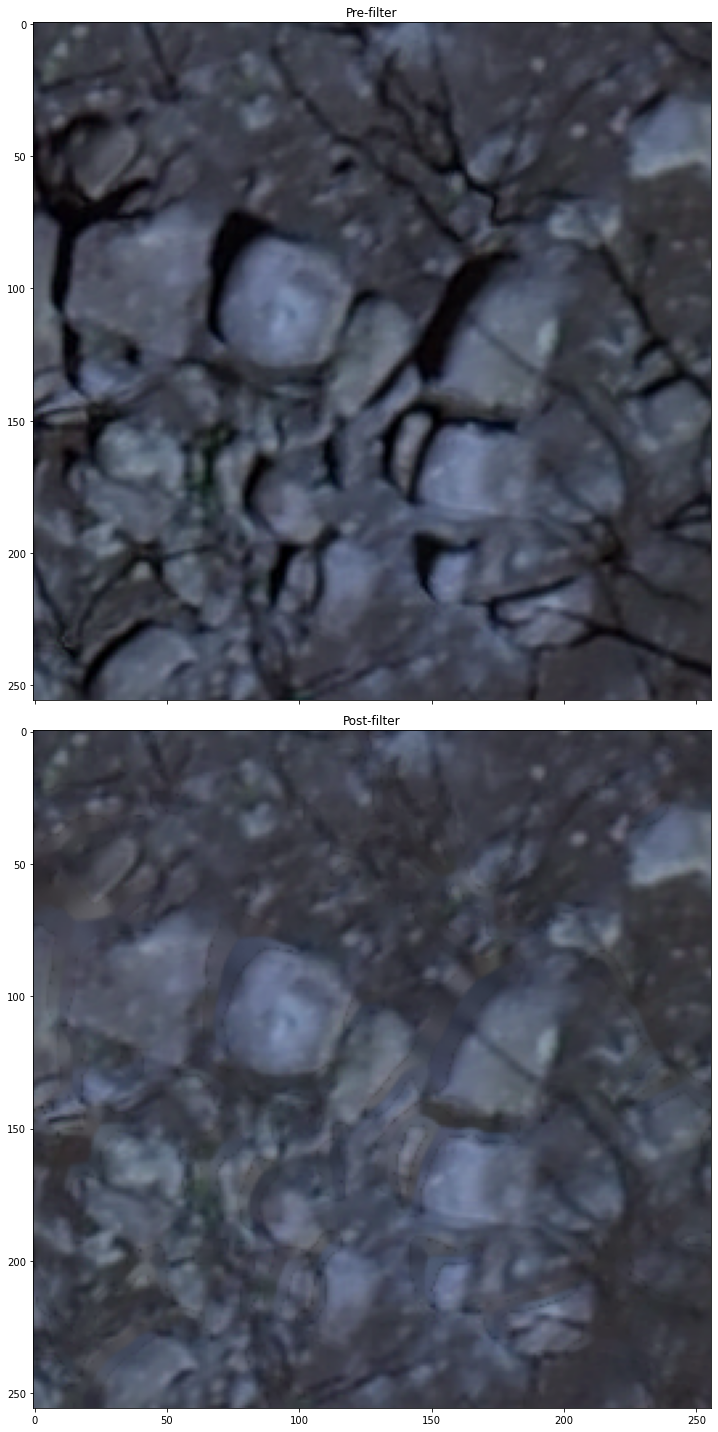

In [47]:
fig, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(20, 20))
ax[0].imshow(img)
#ax[0].contour(training_labels)
ax[0].set_title('Pre-filter')
ax[1].imshow(ip)
ax[1].set_title('Post-filter')
fig.tight_layout()